# PHASE I




In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from keras.utils.vis_utils import plot_model



Bringing in the data file to assign as the dataset

---



In [4]:
file_name = 'adult1.csv'
dataset = pd.read_csv(file_name, delimiter=',')

Making sure our data has the right height and width

In [5]:
# print off rows and columns to make sure the dimensions are correct
print("Rows: %s" % dataset.shape[0])
print("Columns: %s" % dataset.shape[1])

# head shows the first n amount of rows, in this case n=10
dataset.head(10)

Rows: 32561
Columns: 14


age  workclass  fnlwgt  education  educationNum  maritalStatus  \
0   39          3   77516         13            13              0   
1   50          2   83311         13            13              1   
2   38          1  215646         10             9              2   
3   53          1  234721          6             7              1   
4   28          1  338409         13            13              1   
5   37          1  284582         14            14              1   
6   49          1  160187          4             5              3   
7   52          2  209642         10             9              1   
8   31          1   45781         14            14              0   
9   42          1  159449         13            13              1   

   relationship  race  sex  capitalGain  capitalLoss  hoursPerWeek  country  \
0             0     1    1         2174            0            40        1   
1             1     1    1            0            0            13        1   
2             0     1    1            0            0            40        1   
3             1     2    1            0            0            40        1   
4             2     2    0            0            0            40       14   
5             2     1    0            0            0            40        1   
6             0     2    0            0            0            16        2   
7             1     1    1            0            0            45        1   
8             0     1    0        14084            0            50        1   
9             1     1    1         5178            0            40        1   

   earnings  
0         0  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         1  
8         1  
9         1

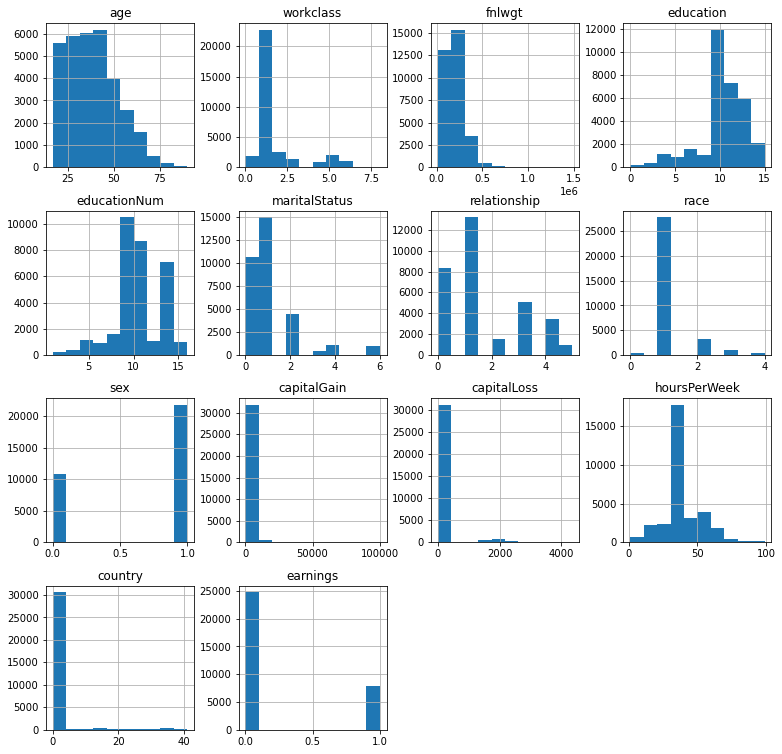

In [6]:
plt.rcParams["figure.figsize"] = ((13,13))
dataset.hist()
plt.show()

In [7]:
dataset.describe()

age     workclass        fnlwgt     education  educationNum  \
count  32561.000000  32561.000000  3.256100e+04  32561.000000  32561.000000   
mean      38.581647      1.622401  1.897784e+05     10.214766     10.080679   
std       13.640433      1.443345  1.055500e+05      2.692418      2.572720   
min       17.000000      0.000000  1.228500e+04      0.000000      1.000000   
25%       28.000000      1.000000  1.178270e+05     10.000000      9.000000   
50%       37.000000      1.000000  1.783560e+05     10.000000     10.000000   
75%       48.000000      1.000000  2.370510e+05     11.000000     12.000000   
max       90.000000      8.000000  1.484705e+06     15.000000     16.000000   

       maritalStatus  relationship          race           sex   capitalGain  \
count   32561.000000  32561.000000  32561.000000  32561.000000  32561.000000   
mean        1.083781      1.542397      1.180093      0.669205   1077.648844   
std         1.251381      1.437431      0.534266      0.470506   7385.292085   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000      0.000000      1.000000      0.000000      0.000000   
50%         1.000000      1.000000      1.000000      1.000000      0.000000   
75%         1.000000      3.000000      1.000000      1.000000      0.000000   
max         6.000000      5.000000      4.000000      1.000000  99999.000000   

        capitalLoss  hoursPerWeek       country      earnings  
count  32561.000000  32561.000000  32561.000000  32561.000000  
mean      87.303830     40.437456      2.305580      0.240810  
std      402.960219     12.347429      5.594557      0.427581  
min        0.000000      1.000000      0.000000      0.000000  
25%        0.000000     40.000000      1.000000      0.000000  
50%        0.000000     40.000000      1.000000      0.000000  
75%        0.000000     45.000000      1.000000      0.000000  
max     4356.000000     99.000000     41.000000      1.000000

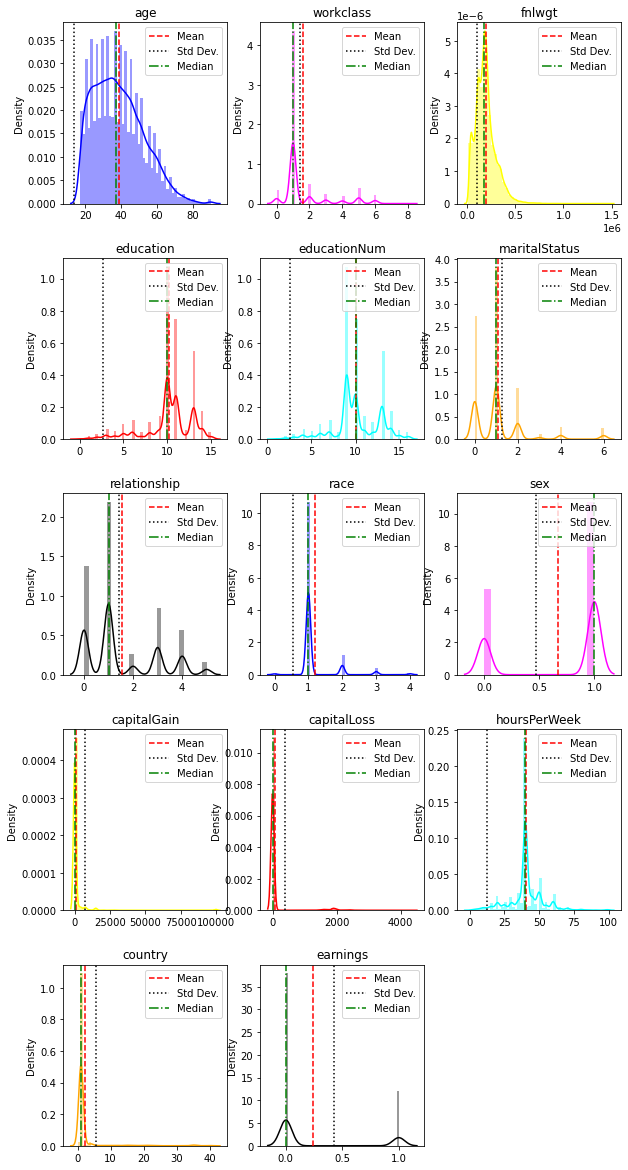

In [8]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum', 'maritalStatus', 'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 'hoursPerWeek', 'country', 'earnings']
c_length  = len(columns)
c_colors  = ["blue", "magenta", "yellow", "red", "cyan", "orange", "black", "blue", "magenta", "yellow", "red", "cyan", "orange", "black"]

import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 25))
for i, j, k in itertools.zip_longest(columns, range(c_length), c_colors):
    plt.subplot(6, 3, j+1)
    sns.distplot(dataset[i], color = k)
    plt.title(i) # Title of column represented
    plt.xlabel("") # clears the x axis label
    plt.subplots_adjust(hspace = 0.3)
    plt.axvline(dataset[i].mean(), color = "red", linestyle="dashed", label="Mean")
    plt.axvline(dataset[i].std(), color = "black", linestyle="dotted", label="Std Dev.")
    plt.axvline(dataset[i].median(), color = "green", linestyle="dashdot", label="Median")
    plt.legend(loc="upper right")

Text(0, 0.5, 'Amount')

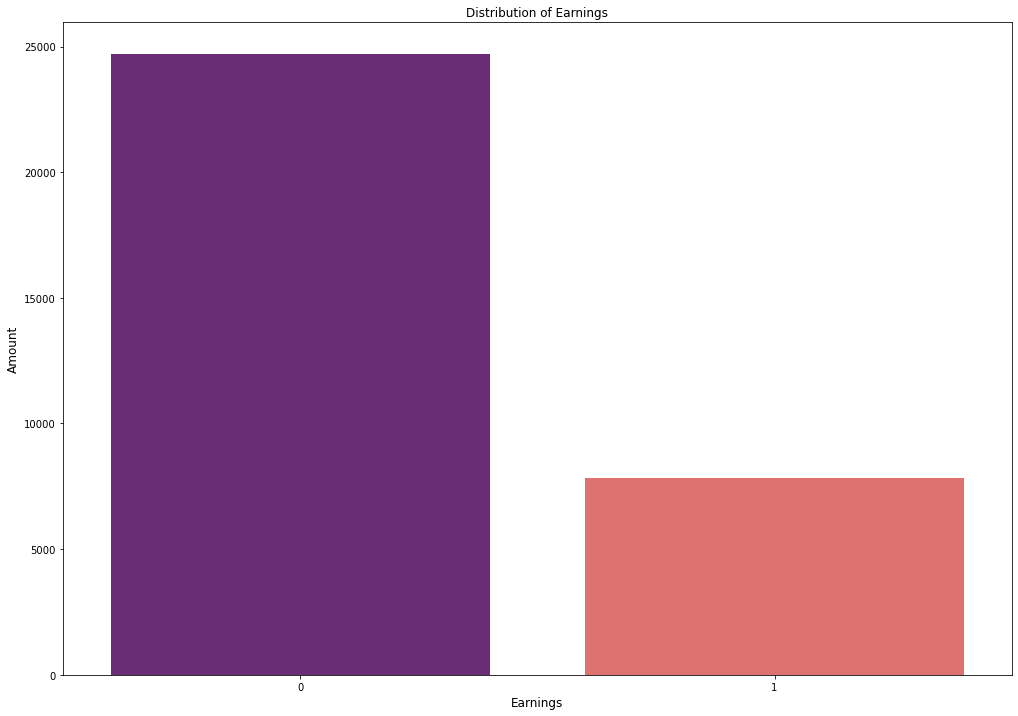

In [9]:
# Distribution of Math Scores
plt.figure(figsize=(17, 12))
axs = sns.countplot(dataset['earnings'], palette='magma')
plt.title('Distribution of Earnings', fontsize=12)
plt.xlabel('Earnings', fontsize=12)
plt.ylabel('Amount', fontsize=12)

Next I will create a correlation map

Honestly I may change my dataset after looking at this, I would like to see more variation

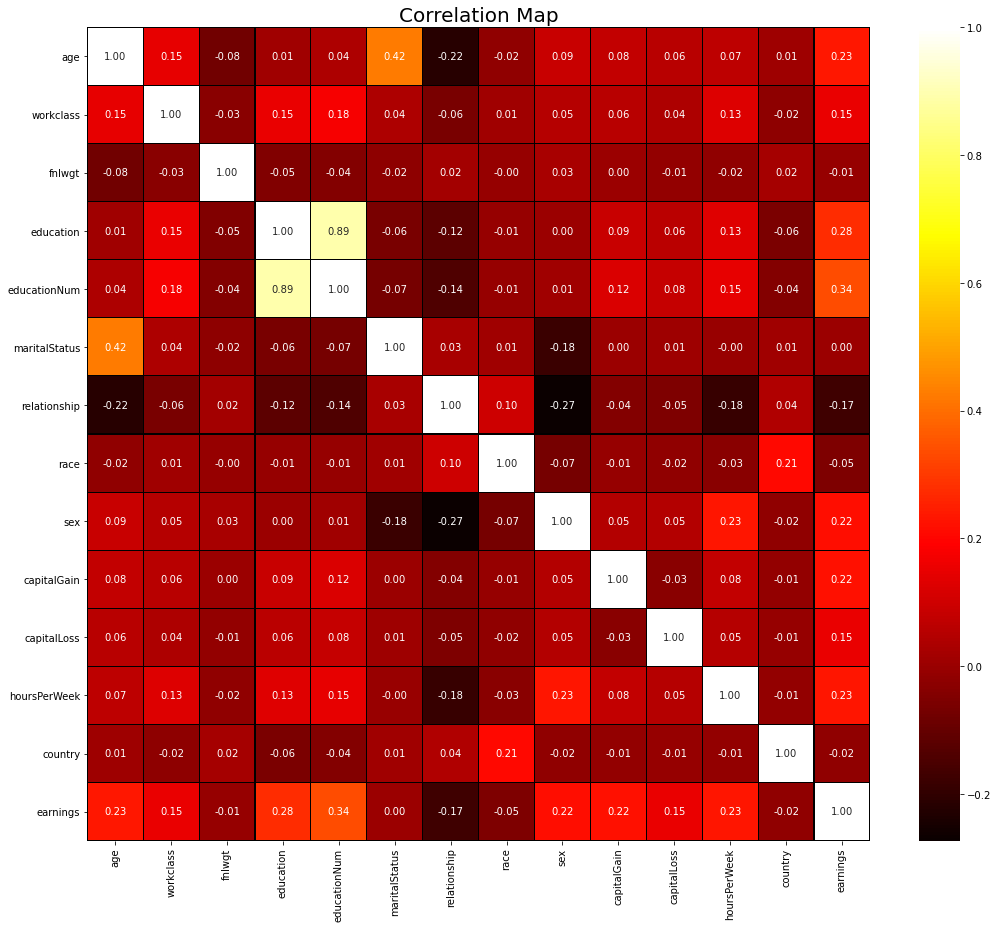

In [10]:
# Correlation
plt.figure(figsize=(15, 13))
sns.heatmap(data=dataset.corr(), annot=True, cmap="hot", linewidths=0.1, fmt=".2f", linecolor="black")
plt.title("Correlation Map", fontsize=20)
plt.tight_layout()
plt.show()

# Honestly I may change my dataset after looking at this, I would like to see more variation

In [11]:
from sklearn import preprocessing
# Normalizing data between (0-1)
x = dataset.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

# Insert column names back into data
normalized_df = pd.DataFrame(x_scaled, columns=dataset.columns)


# Output the first 10 rows to check data is normalized
normalized_df.head(10)


age  workclass    fnlwgt  education  educationNum  maritalStatus  \
0  0.301370      0.375  0.044302   0.866667      0.800000       0.000000   
1  0.452055      0.250  0.048238   0.866667      0.800000       0.166667   
2  0.287671      0.125  0.138113   0.666667      0.533333       0.333333   
3  0.493151      0.125  0.151068   0.400000      0.400000       0.166667   
4  0.150685      0.125  0.221488   0.866667      0.800000       0.166667   
5  0.273973      0.125  0.184932   0.933333      0.866667       0.166667   
6  0.438356      0.125  0.100448   0.266667      0.266667       0.500000   
7  0.479452      0.250  0.134036   0.666667      0.533333       0.166667   
8  0.191781      0.125  0.022749   0.933333      0.866667       0.000000   
9  0.342466      0.125  0.099947   0.866667      0.800000       0.166667   

   relationship  race  sex  capitalGain  capitalLoss  hoursPerWeek   country  \
0           0.0  0.25  1.0     0.021740          0.0      0.397959  0.024390   
1           0.2  0.25  1.0     0.000000          0.0      0.122449  0.024390   
2           0.0  0.25  1.0     0.000000          0.0      0.397959  0.024390   
3           0.2  0.50  1.0     0.000000          0.0      0.397959  0.024390   
4           0.4  0.50  0.0     0.000000          0.0      0.397959  0.341463   
5           0.4  0.25  0.0     0.000000          0.0      0.397959  0.024390   
6           0.0  0.50  0.0     0.000000          0.0      0.153061  0.048780   
7           0.2  0.25  1.0     0.000000          0.0      0.448980  0.024390   
8           0.0  0.25  0.0     0.140841          0.0      0.500000  0.024390   
9           0.2  0.25  1.0     0.051781          0.0      0.397959  0.024390   

   earnings  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
5       0.0  
6       0.0  
7       1.0  
8       1.0  
9       1.0

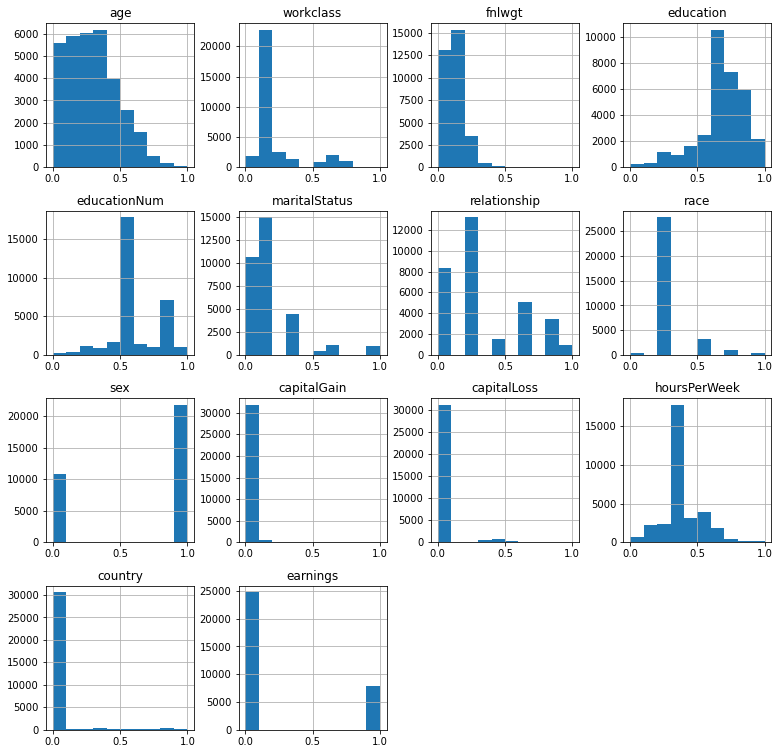

In [12]:
normalized_df.hist()
plt.show()

#Illistrating the Nueral Networks


In [13]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    #source: https://gist.github.com/craffel/2d727968c3aaebd10359
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

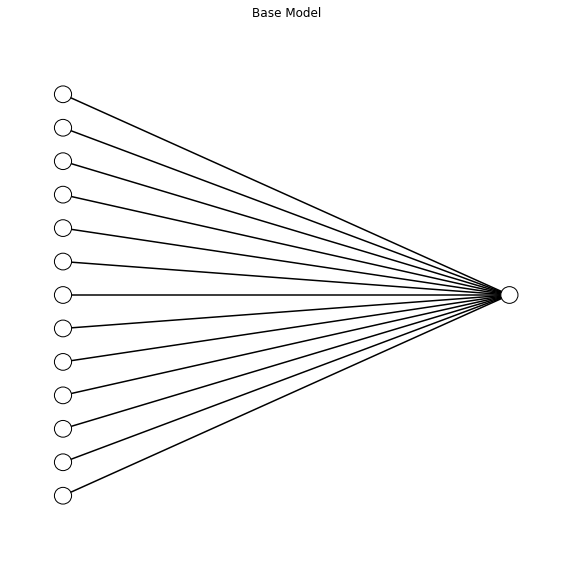

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.axis('off')
ax.set_title("Base Model")
draw_neural_net(ax, .1, .9, .1, .9, [13, 1])

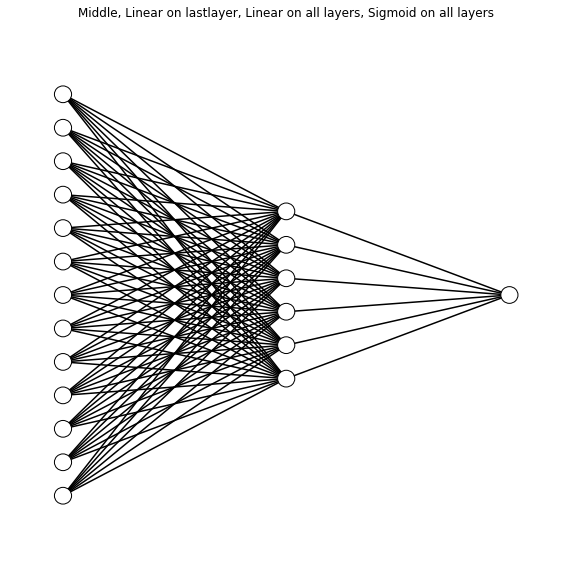

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.axis('off')
ax.set_title("Middle, Linear on lastlayer, Linear on all layers, Sigmoid on all layers")
draw_neural_net(ax, .1, .9, .1, .9, [13,6, 1])

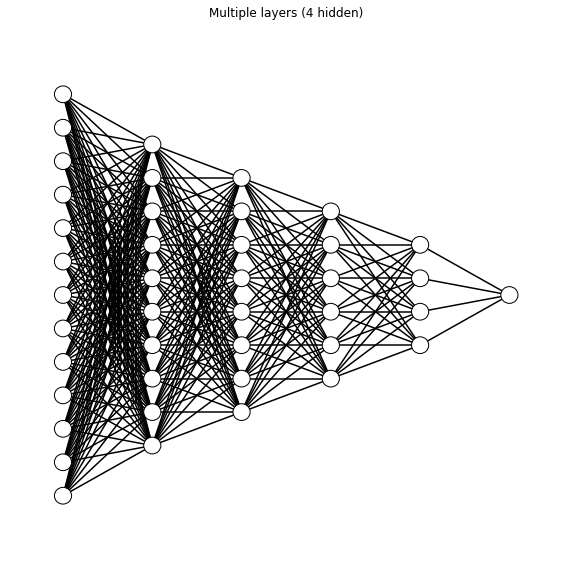

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.axis('off')
ax.set_title("Multiple layers (4 hidden)")
draw_neural_net(ax, .1, .9, .1, .9, [13,10,8,6,4, 1])

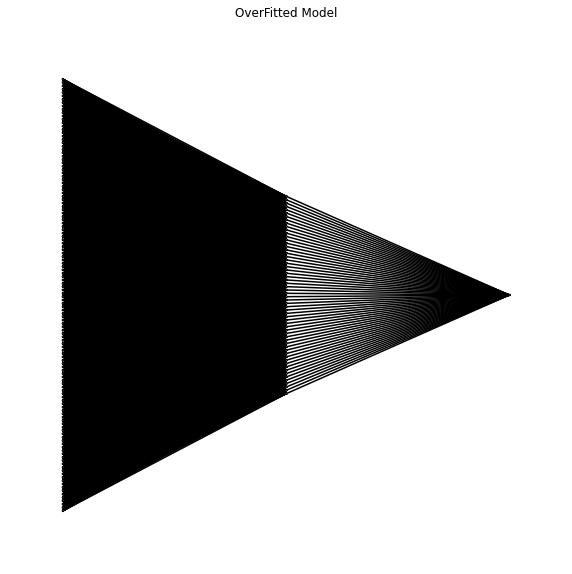

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.axis('off')
ax.set_title("OverFitted Model")
draw_neural_net(ax, .1, .9, .1, .9, [130,60, 1])

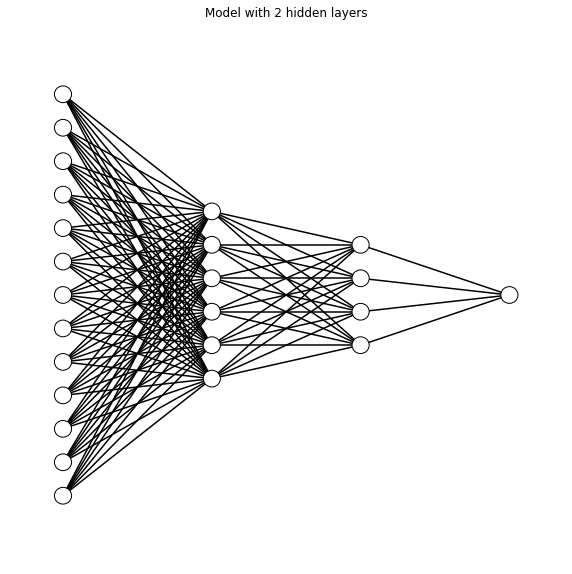

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.axis('off')
ax.set_title("Model with 2 hidden layers")
draw_neural_net(ax, .1, .9, .1, .9, [13,6,4,1])

# PHASE II

Splitting my data into training and validation sets

In [19]:
# Shuffling the dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)

# Convert Pandas DataSet to Numpy Array
dataset_np = dataset.values
X = dataset.drop('earnings', axis='columns').values
Y = dataset['earnings'].values

In [20]:
# Index for 30%
index_30percent = int(0.3 * len(dataset_np[:, 0]))  
print(index_30percent)

# Split into validation (30%) and training (70%)
XVALID = X[:index_30percent, :]
YVALID = Y[:index_30percent]
XTRAIN = X[index_30percent:, :]
YTRAIN = Y[index_30percent:]

9768


In [21]:
# Mean normalization
Xmin = XTRAIN.min(axis = 0) 
Xmax = XTRAIN.max(axis = 0) 
mean = XTRAIN.mean(axis = 0)
XTRAIN = (XTRAIN - mean) / (Xmax - Xmin)
XVALID = (XVALID - mean) / (Xmax - Xmin)

# Rescaling
Ymax = YTRAIN.max()
YTRAIN = YTRAIN / Ymax
YVALID = YVALID / Ymax

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'workclass'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'education'}>],
       [<AxesSubplot:title={'center':'educationNum'}>,
        <AxesSubplot:title={'center':'maritalStatus'}>,
        <AxesSubplot:title={'center':'relationship'}>,
        <AxesSubplot:title={'center':'race'}>],
       [<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'capitalGain'}>,
        <AxesSubplot:title={'center':'capitalLoss'}>,
        <AxesSubplot:title={'center':'hoursPerWeek'}>],
       [<AxesSubplot:title={'center':'country'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

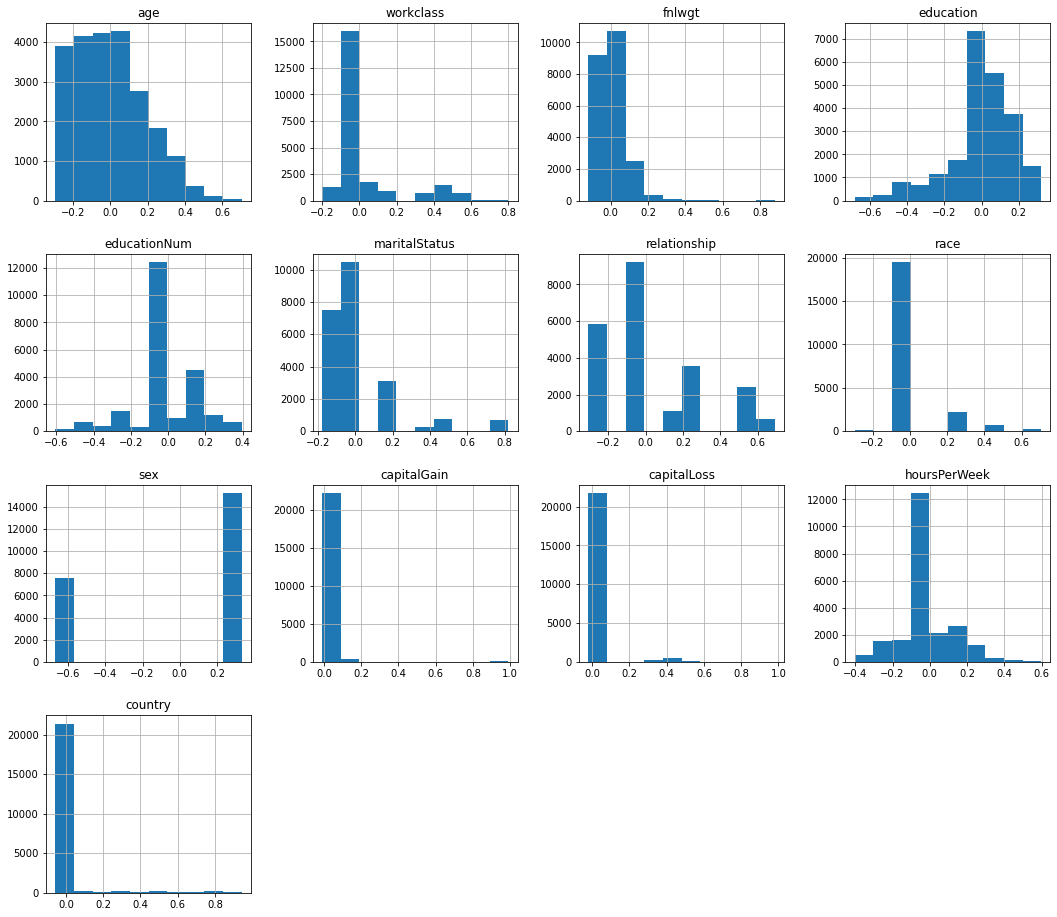

In [22]:
train_norm = pd.DataFrame(data=XTRAIN)
train_norm.columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum', 'maritalStatus', 'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 'hoursPerWeek', 'country']
train_norm.hist(figsize=(18,16))

Next we will set up the models

In [23]:
# Setting up the models

# Base model 1 input, 1 output
model_base = Sequential([ 
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

# adding a middle layer
model_middle = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

# adding another hidden layer
model_4_layers = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

# adding multiple hidden layers
model_mult_layers = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=10, activation='relu'),
                    Dense(units=8, activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

# linear activation on last layer
model_linear_last = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=1, activation='linear')
])

# linear activation on all layers
model_linear_all = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='linear'),
                    Dense(units=6, activation='linear'),
                    Dense(units=1, activation='linear')
])

# sigmoid activation on all layers
model_sigmoid_all = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='sigmoid'),
                    Dense(units=6, activation='sigmoid'),
                    Dense(units=1, activation='sigmoid')
])

# Overfitted model
model_overfitted = Sequential([
                    Dense(units=120, input_dim = len(XTRAIN[0, :]), activation='linear'),
                    Dense(units=60, activation='linear'),
                    Dense(units=1, activation='linear')
])




In [24]:
model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                168       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


Now we must compile each model to prepare it for the .fit() function

In [25]:
model_base.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_middle.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_4_layers.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_mult_layers.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_linear_last.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_linear_all.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_sigmoid_all.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_overfitted.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [26]:
# Learn the model from training set
history1 = model_base.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 3s 5ms/step - loss: 0.5654 - accuracy: 0.7199 - val_loss: 0.4582 - val_accuracy: 0.7880
Epoch 2/100
357/357 [==============================] - 2s 6ms/step - loss: 0.4254 - accuracy: 0.8066 - val_loss: 0.4152 - val_accuracy: 0.8103
Epoch 3/100
357/357 [==============================] - 1s 4ms/step - loss: 0.4043 - accuracy: 0.8159 - val_loss: 0.4055 - val_accuracy: 0.8162
Epoch 4/100
357/357 [==============================] - 2s 5ms/step - loss: 0.3958 - accuracy: 0.8200 - val_loss: 0.3985 - val_accuracy: 0.8173
Epoch 5/100
357/357 [==============================] - 2s 6ms/step - loss: 0.3884 - accuracy: 0.8221 - val_loss: 0.3915 - val_accuracy: 0.8189
Epoch 6/100
357/357 [==============================] - 2s 6ms/step - loss: 0.3809 - accuracy: 0.8253 - val_loss: 0.3845 - val_accuracy: 0.8219
Epoch 7/100
357/357 [==============================] - 2s 5ms/step - loss: 0.3731 - accuracy: 0.8280 - val_loss: 0.3770 - val_accuracy: 0.8268

Epoch 58/100
357/357 [==============================] - 2s 5ms/step - loss: 0.3190 - accuracy: 0.8503 - val_loss: 0.3295 - val_accuracy: 0.8445
Epoch 59/100
357/357 [==============================] - 3s 8ms/step - loss: 0.3190 - accuracy: 0.8493 - val_loss: 0.3292 - val_accuracy: 0.8451
Epoch 60/100
357/357 [==============================] - 2s 6ms/step - loss: 0.3188 - accuracy: 0.8493 - val_loss: 0.3296 - val_accuracy: 0.8441
Epoch 61/100
357/357 [==============================] - 2s 7ms/step - loss: 0.3189 - accuracy: 0.8497 - val_loss: 0.3294 - val_accuracy: 0.8443
Epoch 62/100
357/357 [==============================] - 2s 5ms/step - loss: 0.3187 - accuracy: 0.8495 - val_loss: 0.3294 - val_accuracy: 0.8443
Epoch 63/100
357/357 [==============================] - 2s 4ms/step - loss: 0.3188 - accuracy: 0.8493 - val_loss: 0.3294 - val_accuracy: 0.8438
Epoch 64/100
357/357 [==============================] - 1s 4ms/step - loss: 0.3186 - accuracy: 0.8497 - val_loss: 0.3291 - val_accuracy:

In [27]:
history2 = model_middle.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 3s 5ms/step - loss: 0.5202 - accuracy: 0.7587 - val_loss: 0.4354 - val_accuracy: 0.8020
Epoch 2/100
357/357 [==============================] - 1s 4ms/step - loss: 0.4067 - accuracy: 0.8153 - val_loss: 0.3953 - val_accuracy: 0.8157
Epoch 3/100
357/357 [==============================] - 1s 3ms/step - loss: 0.3737 - accuracy: 0.8235 - val_loss: 0.3674 - val_accuracy: 0.8278
Epoch 4/100
357/357 [==============================] - 1s 3ms/step - loss: 0.3502 - accuracy: 0.8330 - val_loss: 0.3508 - val_accuracy: 0.8363
Epoch 5/100
357/357 [==============================] - 1s 4ms/step - loss: 0.3377 - accuracy: 0.8407 - val_loss: 0.3416 - val_accuracy: 0.8403
Epoch 6/100
357/357 [==============================] - 1s 4ms/step - loss: 0.3322 - accuracy: 0.8429 - val_loss: 0.3369 - val_accuracy: 0.8415
Epoch 7/100
357/357 [==============================] - 1s 4ms/step - loss: 0.3287 - accuracy: 0.8443 - val_loss: 0.3353 - val_accuracy: 0.8428

Epoch 58/100
357/357 [==============================] - 1s 4ms/step - loss: 0.3144 - accuracy: 0.8503 - val_loss: 0.3300 - val_accuracy: 0.8457
Epoch 59/100
357/357 [==============================] - 1s 3ms/step - loss: 0.3147 - accuracy: 0.8514 - val_loss: 0.3288 - val_accuracy: 0.8465
Epoch 60/100
357/357 [==============================] - 1s 4ms/step - loss: 0.3146 - accuracy: 0.8507 - val_loss: 0.3291 - val_accuracy: 0.8464
Epoch 61/100
357/357 [==============================] - 1s 3ms/step - loss: 0.3144 - accuracy: 0.8515 - val_loss: 0.3298 - val_accuracy: 0.8461
Epoch 62/100
357/357 [==============================] - 1s 4ms/step - loss: 0.3143 - accuracy: 0.8508 - val_loss: 0.3293 - val_accuracy: 0.8450
Epoch 63/100
357/357 [==============================] - 2s 5ms/step - loss: 0.3142 - accuracy: 0.8516 - val_loss: 0.3290 - val_accuracy: 0.8467
Epoch 64/100
357/357 [==============================] - 1s 3ms/step - loss: 0.3138 - accuracy: 0.8510 - val_loss: 0.3293 - val_accuracy:

In [28]:
history3 = model_4_layers.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 2s 4ms/step - loss: 0.5993 - accuracy: 0.7534 - val_loss: 0.4249 - val_accuracy: 0.8071
Epoch 2/100
357/357 [==============================] - 1s 3ms/step - loss: 0.3986 - accuracy: 0.8188 - val_loss: 0.3899 - val_accuracy: 0.8180
Epoch 3/100
357/357 [==============================] - 1s 3ms/step - loss: 0.3690 - accuracy: 0.8267 - val_loss: 0.3600 - val_accuracy: 0.8312
Epoch 4/100
357/357 [==============================] - 2s 5ms/step - loss: 0.3440 - accuracy: 0.8382 - val_loss: 0.3447 - val_accuracy: 0.8401
Epoch 5/100
357/357 [==============================] - 1s 4ms/step - loss: 0.3345 - accuracy: 0.8417 - val_loss: 0.3393 - val_accuracy: 0.8431
Epoch 6/100
357/357 [==============================] - 2s 4ms/step - loss: 0.3307 - accuracy: 0.8437 - val_loss: 0.3365 - val_accuracy: 0.8420
Epoch 7/100
357/357 [==============================] - 1s 4ms/step - loss: 0.3287 - accuracy: 0.8454 - val_loss: 0.3352 - val_accuracy: 0.8429

Epoch 58/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3167 - accuracy: 0.8515 - val_loss: 0.3301 - val_accuracy: 0.8424
Epoch 59/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3164 - accuracy: 0.8509 - val_loss: 0.3293 - val_accuracy: 0.8441
Epoch 60/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3164 - accuracy: 0.8514 - val_loss: 0.3306 - val_accuracy: 0.8464
Epoch 61/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3161 - accuracy: 0.8518 - val_loss: 0.3308 - val_accuracy: 0.8458
Epoch 62/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3161 - accuracy: 0.8505 - val_loss: 0.3307 - val_accuracy: 0.8445
Epoch 63/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3159 - accuracy: 0.8506 - val_loss: 0.3297 - val_accuracy: 0.8451
Epoch 64/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3162 - accuracy: 0.8508 - val_loss: 0.3300 - val_accuracy:

In [29]:
history4 = model_mult_layers.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4903 - accuracy: 0.7802 - val_loss: 0.4106 - val_accuracy: 0.8061
Epoch 2/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3840 - accuracy: 0.8167 - val_loss: 0.3782 - val_accuracy: 0.8174
Epoch 3/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3573 - accuracy: 0.8308 - val_loss: 0.3557 - val_accuracy: 0.8340
Epoch 4/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3422 - accuracy: 0.8393 - val_loss: 0.3456 - val_accuracy: 0.8401
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3348 - accuracy: 0.8450 - val_loss: 0.3418 - val_accuracy: 0.8434
Epoch 6/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3286 - accuracy: 0.8483 - val_loss: 0.3427 - val_accuracy: 0.8410
Epoch 7/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3259 - accuracy: 0.8493 - val_loss: 0.3342 - val_accuracy: 0.8448

Epoch 58/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3119 - accuracy: 0.8519 - val_loss: 0.3299 - val_accuracy: 0.8433
Epoch 59/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3113 - accuracy: 0.8518 - val_loss: 0.3297 - val_accuracy: 0.8437
Epoch 60/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3116 - accuracy: 0.8521 - val_loss: 0.3290 - val_accuracy: 0.8435
Epoch 61/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3115 - accuracy: 0.8519 - val_loss: 0.3298 - val_accuracy: 0.8431
Epoch 62/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3118 - accuracy: 0.8525 - val_loss: 0.3304 - val_accuracy: 0.8444
Epoch 63/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3113 - accuracy: 0.8519 - val_loss: 0.3301 - val_accuracy: 0.8430
Epoch 64/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3116 - accuracy: 0.8504 - val_loss: 0.3313 - val_accuracy:

In [30]:
history5 = model_linear_last.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 2s 2ms/step - loss: 0.5044 - accuracy: 0.7713 - val_loss: 0.4400 - val_accuracy: 0.7902
Epoch 2/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4118 - accuracy: 0.8047 - val_loss: 0.4075 - val_accuracy: 0.8049
Epoch 3/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3886 - accuracy: 0.8157 - val_loss: 0.4011 - val_accuracy: 0.8146
Epoch 4/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3722 - accuracy: 0.8217 - val_loss: 0.3796 - val_accuracy: 0.8237
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3612 - accuracy: 0.8298 - val_loss: 0.3702 - val_accuracy: 0.8287
Epoch 6/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3527 - accuracy: 0.8349 - val_loss: 0.3773 - val_accuracy: 0.8334
Epoch 7/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3451 - accuracy: 0.8395 - val_loss: 0.3640 - val_accuracy: 0.8394

Epoch 58/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3255 - accuracy: 0.8496 - val_loss: 0.3543 - val_accuracy: 0.8452
Epoch 59/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3219 - accuracy: 0.8504 - val_loss: 0.3563 - val_accuracy: 0.8452
Epoch 60/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3218 - accuracy: 0.8498 - val_loss: 0.3575 - val_accuracy: 0.8435
Epoch 61/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3245 - accuracy: 0.8493 - val_loss: 0.3474 - val_accuracy: 0.8454
Epoch 62/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3228 - accuracy: 0.8493 - val_loss: 0.3569 - val_accuracy: 0.8455
Epoch 63/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3206 - accuracy: 0.8499 - val_loss: 0.3583 - val_accuracy: 0.8446
Epoch 64/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3216 - accuracy: 0.8508 - val_loss: 0.3590 - val_accuracy:

In [31]:
history6 = model_linear_all.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.6266 - accuracy: 0.7620 - val_loss: 0.4845 - val_accuracy: 0.7782
Epoch 2/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4613 - accuracy: 0.7891 - val_loss: 0.4608 - val_accuracy: 0.7882
Epoch 3/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4380 - accuracy: 0.7996 - val_loss: 0.4429 - val_accuracy: 0.7962
Epoch 4/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4304 - accuracy: 0.8017 - val_loss: 0.4458 - val_accuracy: 0.7967
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4237 - accuracy: 0.8088 - val_loss: 0.4367 - val_accuracy: 0.8060
Epoch 6/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4209 - accuracy: 0.8092 - val_loss: 0.4276 - val_accuracy: 0.8054
Epoch 7/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4281 - accuracy: 0.8091 - val_loss: 0.4397 - val_accuracy: 0.8078

Epoch 58/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4050 - accuracy: 0.8188 - val_loss: 0.4298 - val_accuracy: 0.8151
Epoch 59/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4057 - accuracy: 0.8184 - val_loss: 0.4228 - val_accuracy: 0.8133
Epoch 60/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4031 - accuracy: 0.8178 - val_loss: 0.4273 - val_accuracy: 0.8136
Epoch 61/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4049 - accuracy: 0.8186 - val_loss: 0.4277 - val_accuracy: 0.8165
Epoch 62/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4067 - accuracy: 0.8181 - val_loss: 0.4393 - val_accuracy: 0.8146
Epoch 63/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4273 - accuracy: 0.8066 - val_loss: 0.4260 - val_accuracy: 0.8085
Epoch 64/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4063 - accuracy: 0.8143 - val_loss: 0.4265 - val_accuracy:

In [32]:
history7 = model_sigmoid_all.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.5447 - accuracy: 0.7593 - val_loss: 0.5307 - val_accuracy: 0.7590
Epoch 2/100
357/357 [==============================] - 1s 2ms/step - loss: 0.5053 - accuracy: 0.7593 - val_loss: 0.4792 - val_accuracy: 0.7590
Epoch 3/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4539 - accuracy: 0.7738 - val_loss: 0.4404 - val_accuracy: 0.7899
Epoch 4/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4279 - accuracy: 0.8015 - val_loss: 0.4266 - val_accuracy: 0.8009
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4183 - accuracy: 0.8075 - val_loss: 0.4211 - val_accuracy: 0.8038
Epoch 6/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4137 - accuracy: 0.8099 - val_loss: 0.4178 - val_accuracy: 0.8047
Epoch 7/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4107 - accuracy: 0.8117 - val_loss: 0.4158 - val_accuracy: 0.8034

Epoch 58/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3639 - accuracy: 0.8314 - val_loss: 0.3709 - val_accuracy: 0.8263
Epoch 59/100
357/357 [==============================] - 1s 1ms/step - loss: 0.3625 - accuracy: 0.8318 - val_loss: 0.3693 - val_accuracy: 0.8273
Epoch 60/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3611 - accuracy: 0.8326 - val_loss: 0.3695 - val_accuracy: 0.8267
Epoch 61/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3599 - accuracy: 0.8329 - val_loss: 0.3668 - val_accuracy: 0.8283
Epoch 62/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3581 - accuracy: 0.8338 - val_loss: 0.3677 - val_accuracy: 0.8280
Epoch 63/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3573 - accuracy: 0.8334 - val_loss: 0.3641 - val_accuracy: 0.8298
Epoch 64/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3561 - accuracy: 0.8344 - val_loss: 0.3631 - val_accuracy:

In [33]:
history8 = model_overfitted.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.5143 - accuracy: 0.7874 - val_loss: 0.4596 - val_accuracy: 0.7928
Epoch 2/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4435 - accuracy: 0.8029 - val_loss: 0.4519 - val_accuracy: 0.7947
Epoch 3/100
357/357 [==============================] - 1s 2ms/step - loss: 0.5048 - accuracy: 0.7975 - val_loss: 0.4687 - val_accuracy: 0.8059
Epoch 4/100
357/357 [==============================] - 1s 2ms/step - loss: 1.1649 - accuracy: 0.7361 - val_loss: 1.3641 - val_accuracy: 0.7403
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 1.2022 - accuracy: 0.7094 - val_loss: 0.6735 - val_accuracy: 0.7518
Epoch 6/100
357/357 [==============================] - 1s 2ms/step - loss: 0.5679 - accuracy: 0.7613 - val_loss: 0.5254 - val_accuracy: 0.7518
Epoch 7/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4664 - accuracy: 0.7734 - val_loss: 0.4690 - val_accuracy: 0.7771

Epoch 58/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4272 - accuracy: 0.8108 - val_loss: 0.4953 - val_accuracy: 0.7830
Epoch 59/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4337 - accuracy: 0.8069 - val_loss: 0.5467 - val_accuracy: 0.7405
Epoch 60/100
357/357 [==============================] - 1s 3ms/step - loss: 0.4395 - accuracy: 0.8042 - val_loss: 0.4251 - val_accuracy: 0.8087
Epoch 61/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4110 - accuracy: 0.8166 - val_loss: 0.4383 - val_accuracy: 0.8149
Epoch 62/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4082 - accuracy: 0.8173 - val_loss: 0.4218 - val_accuracy: 0.8148
Epoch 63/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4393 - accuracy: 0.8100 - val_loss: 0.4312 - val_accuracy: 0.8098
Epoch 64/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4116 - accuracy: 0.8166 - val_loss: 0.4306 - val_accuracy:

In [34]:
def get_accuracy(model):
    scores = model.evaluate(XTRAIN, YTRAIN)
    percent = (scores[1] * 100.0)
    formatted_percent = "{:.2f}".format(percent)
    print("Training set Accuracy: ", formatted_percent , "%")

In [35]:
get_accuracy(model_base)

713/713 [==============================] - 1s 1ms/step - loss: 0.3162 - accuracy: 0.8514
Training set Accuracy:  85.14 %


In [36]:
get_accuracy(model_middle)

713/713 [==============================] - 1s 1ms/step - loss: 0.3112 - accuracy: 0.8535
Training set Accuracy:  85.35 %


In [37]:
get_accuracy(model_mult_layers)

713/713 [==============================] - 1s 1ms/step - loss: 0.3088 - accuracy: 0.8534
Training set Accuracy:  85.34 %


In [38]:
get_accuracy(model_4_layers)

713/713 [==============================] - 1s 1ms/step - loss: 0.3131 - accuracy: 0.8531
Training set Accuracy:  85.31 %


In [39]:
get_accuracy(model_linear_last)

713/713 [==============================] - 1s 1ms/step - loss: 0.3202 - accuracy: 0.8505
Training set Accuracy:  85.05 %


In [40]:
get_accuracy(model_linear_all)

713/713 [==============================] - 1s 1ms/step - loss: 0.4018 - accuracy: 0.8191
Training set Accuracy:  81.91 %


In [41]:
get_accuracy(model_sigmoid_all)

713/713 [==============================] - 1s 1ms/step - loss: 0.3348 - accuracy: 0.8426
Training set Accuracy:  84.26 %


In [42]:
get_accuracy(model_overfitted)

713/713 [==============================] - 1s 1ms/step - loss: 0.4331 - accuracy: 0.8153
Training set Accuracy:  81.53 %


In [43]:
def learning_curve(m_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    ax1.plot(m_history.history['loss'])
    ax1.plot(m_history.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Training loss data', 'Validation loss data'], loc='upper right')

    ax2.plot(m_history.history['accuracy'])
    ax2.plot(m_history.history['val_accuracy'])
    ax2.set_title('Model Accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Training accuracy data', 'Validation accuracy data'], loc='lower right')

    fig.show()

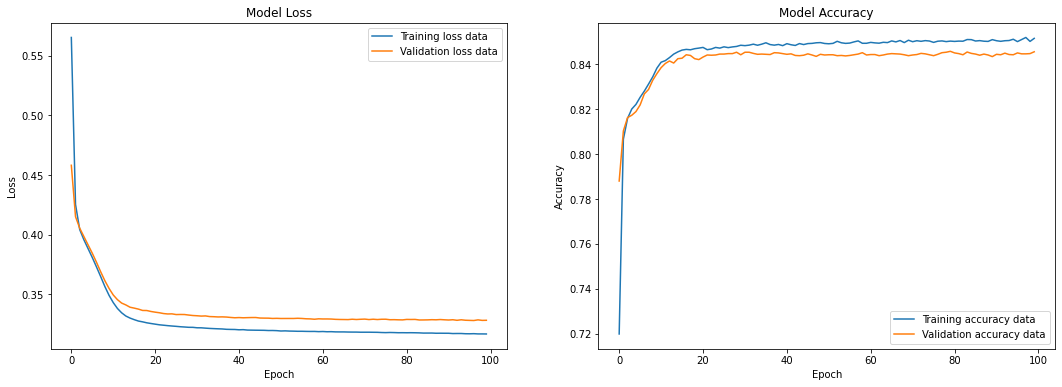

In [44]:
learning_curve(history1)

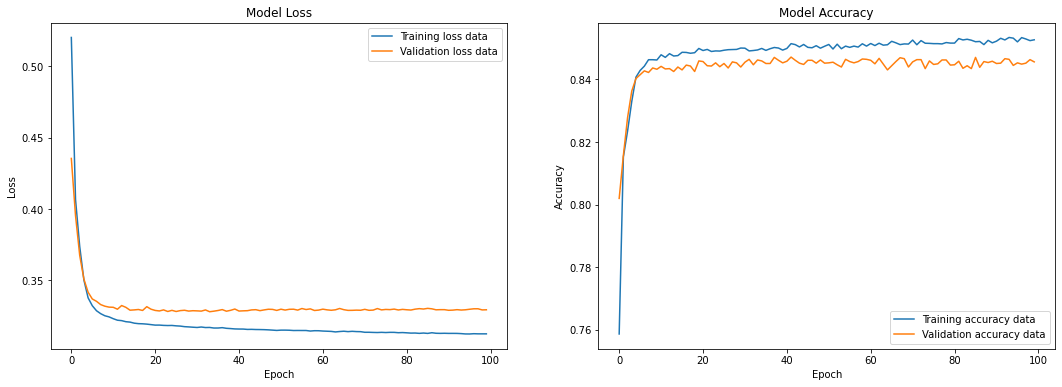

In [45]:
learning_curve(history2)

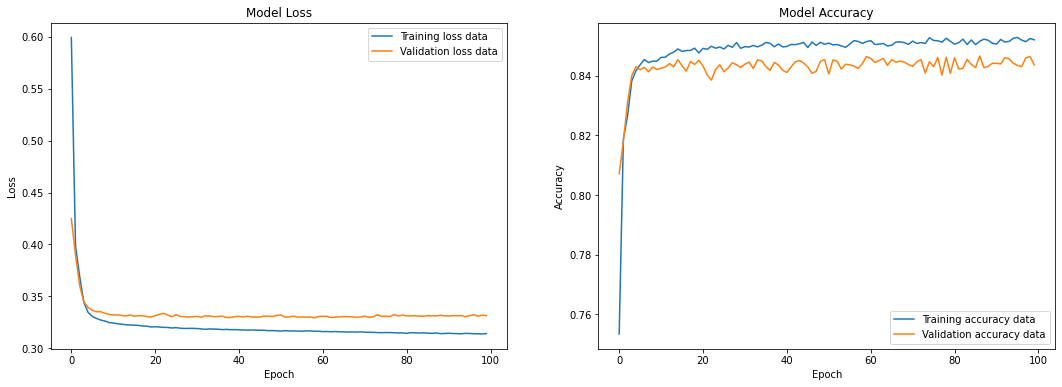

In [46]:
learning_curve(history3)

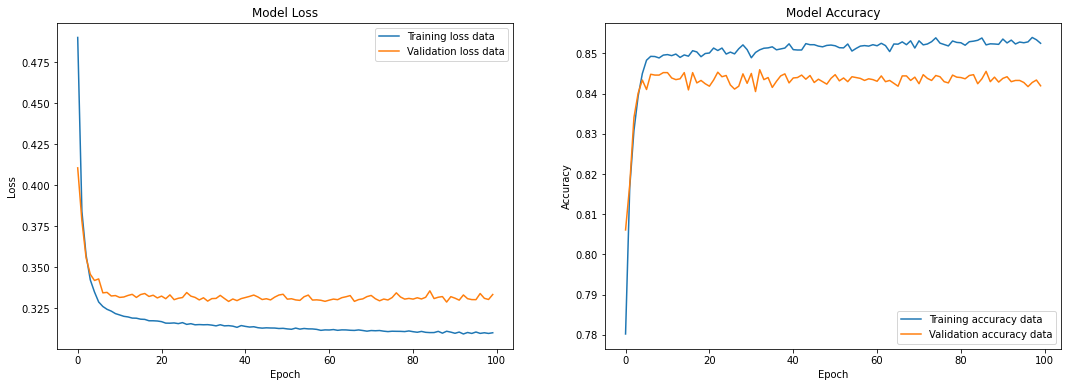

In [47]:
learning_curve(history4)

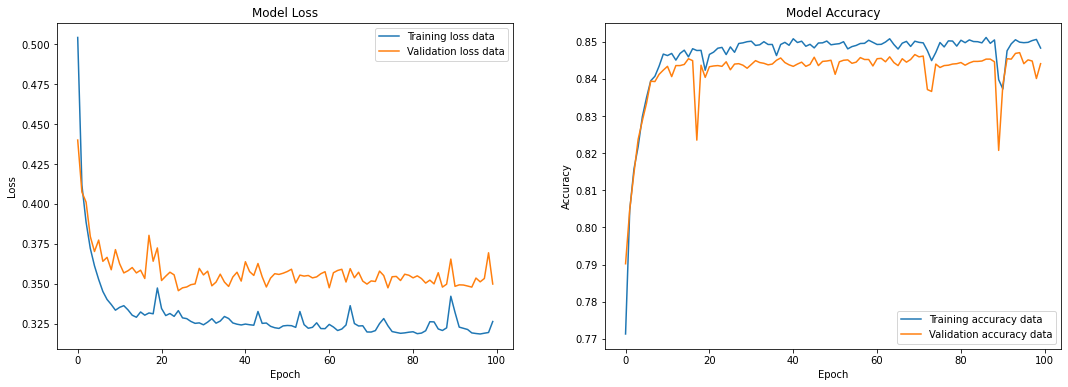

In [48]:
learning_curve(history5)

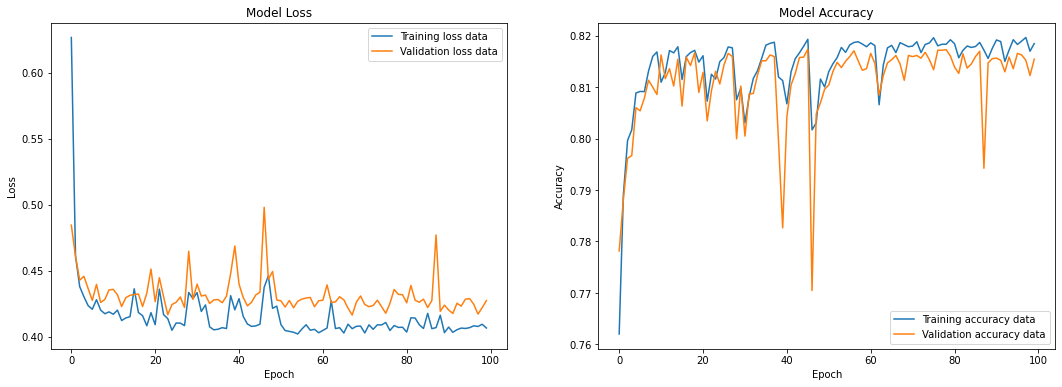

In [49]:
learning_curve(history6)

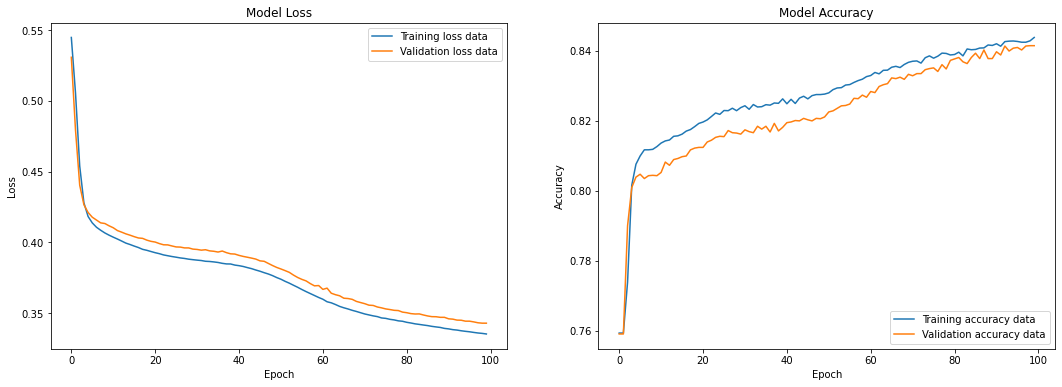

In [50]:
learning_curve(history7)

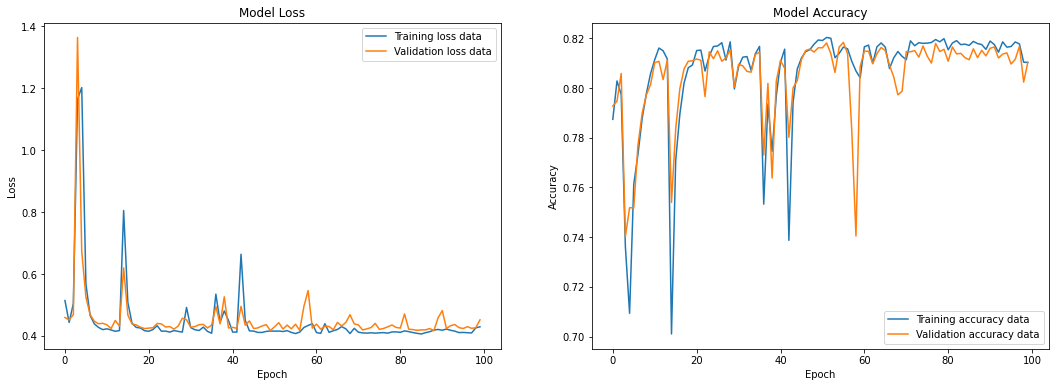

In [51]:
learning_curve(history8)

In [52]:
plot_model(model_base, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


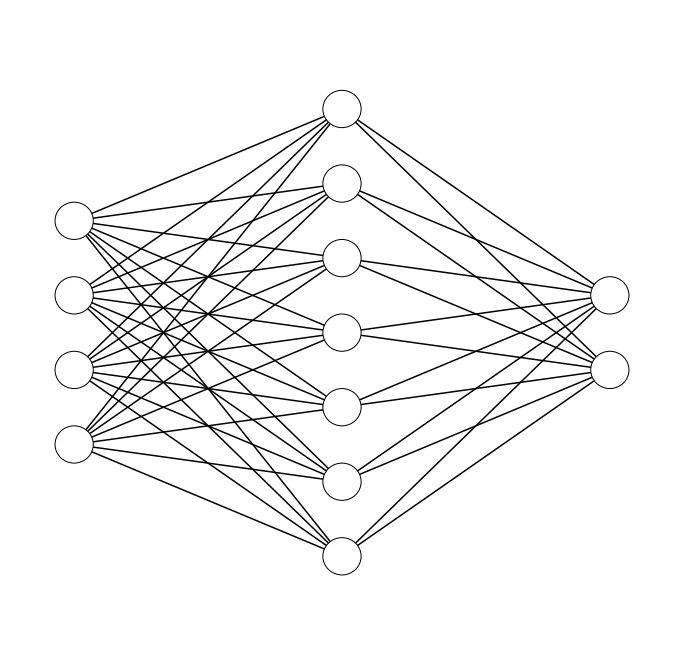

In [53]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [4, 7, 2])


In [54]:
! jupyter nbconvert --to html Second_Phase.ipynb

[NbConvertApp] Converting notebook Second_Phase.ipynb to html
[NbConvertApp] Writing 1745667 bytes to Second_Phase.html
